In [49]:
import scipy.io

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [50]:
PATH = '/home/ravi/Models-of-Working-Memory/b_data/matlab_code/P00_data_behavior'

In [51]:
pat = scipy.io.loadmat(f'{PATH}/b_data_subject_1')

In [54]:
def build_tile_df(N=20):
    dfs = []
    for i in range(N):
        pat = scipy.io.loadmat(f'{PATH}/b_data_subject_{i+1}')
        pat = pat['b_data'][0]
        match = pat[0][1].flatten()
        random_match = pat[1][1].flatten()
        tile_clicked = pat[11][1].flatten()[1::2]
        board_size = pat[6][1].flatten()[1::2]
        correct_tile = pat[12][1].flatten()[0::2]
        nslc = pat[3][1].flatten()[1::2]
        nsp = pat[2][1].flatten()[1::2]
        rt = pat[5][1].flatten()

        categories = {0: 'z', 1: 'animal', 2: 'food', 3: 'indoor', 4: 'person', 5: 'vehicle'}        
        img_category = pat[10][1].flatten()
        img_category = np.vectorize(categories.get)(img_category)

        dfs.append(pd.DataFrame({
            'match': match,
            'random_match': random_match,
            'tile_clicked': tile_clicked-1,
            'board_size': board_size,
            'correct_tile': correct_tile-1,
            'clicked_category': img_category[1::2],
            'corr_category': img_category[0::2],
            'nslc': nslc,
            'nsp': nsp,
            'reaction_time': rt,
            'patient': i+1,
        }))
    return pd.concat(dfs).reset_index(drop=True)

In [55]:
df = build_tile_df()

In [45]:
df['Trial'] = 'Mismatch'
df.loc[df['match'] == 1, 'Trial'] = 'Match'
df['board_size'] = df['board_size'].apply(np.sqrt)

# Metrics

<Figure size 800x1600 with 0 Axes>

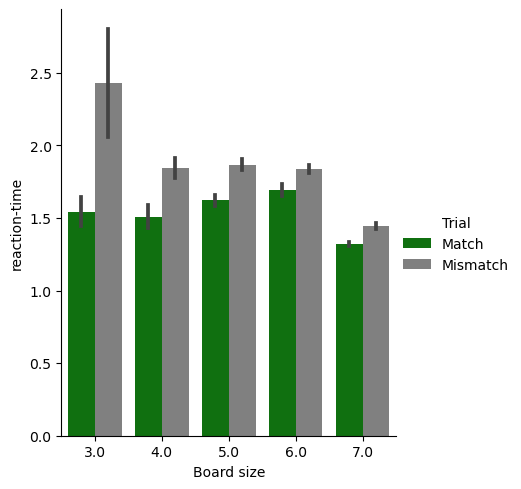

In [46]:
plt.figure(figsize=(8, 16))
palette = ['green', 'grey']
# Draw a nested barplot by species and sex
ax = sns.catplot(x="board_size", y="reaction_time", hue='Trial', data=df, aspect=0.85, kind='bar', errorbar='se', palette=palette, hue_order=['Match', 'Mismatch'])
ax.set(xlabel="Board size", ylabel="reaction-time")
plt.show()

<Figure size 800x1600 with 0 Axes>

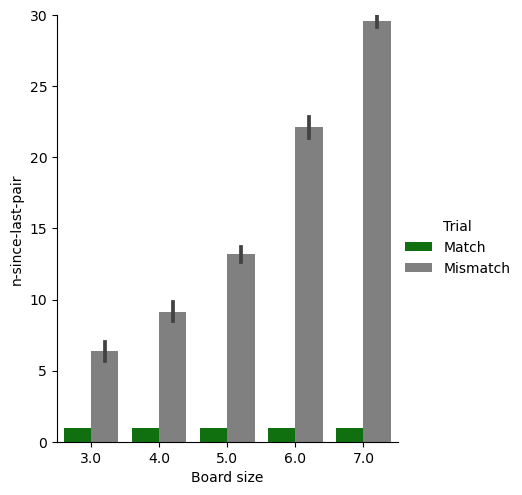

In [47]:
plt.figure(figsize=(8, 16))
palette = ['green', 'grey']
# Draw a nested barplot by species and sex
ax = sns.catplot(x="board_size", y="nsp", hue='Trial', data=df[df['nsp'] > 0], aspect=0.85, errorbar='se', kind='bar', palette=palette, hue_order=['Match', 'Mismatch'])
ax.set(xlabel="Board size", ylabel="n-since-last-pair")
plt.ylim(0, 30)
plt.show()

<Figure size 800x1600 with 0 Axes>

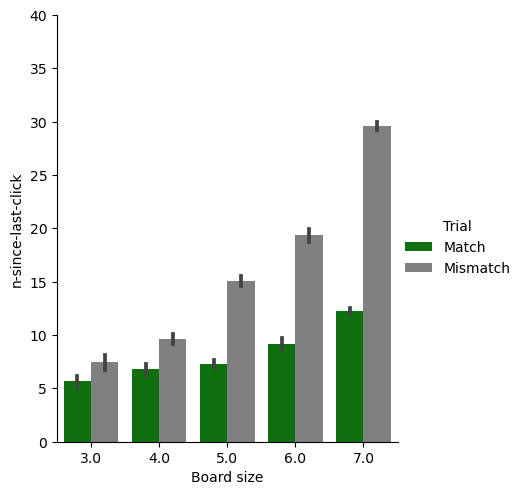

In [48]:
plt.figure(figsize=(8, 16))
palette = ['green', 'grey']
# Draw a nested barplot by species and sex
ax = sns.catplot(x="board_size", y="nslc", hue='Trial', data=df[df['nslc'] > 0], aspect=0.85, errorbar='se', kind='bar', palette=palette, hue_order=['Match', 'Mismatch'])
ax.set(xlabel="Board size", ylabel="n-since-last-click")
plt.ylim(0, 40)
plt.show()